# Analysis of US News & World Report University Rankings: 1990-2023

In this project, we'll be analyzing data from the US News & World Report University Rankings across the past 30+ years. The dataset we'll be looking at comes from Andrew G. Reiter, “U.S. News & World Report Historical Liberal Arts College and University Rankings,” available at: http://andyreiter.com/datasets/. Note that this dataset is only for _universities_ and does not include liberal arts colleges.

I'll begin by reiterating a few remarks about the dataset that Reiter makes at the above link, as they have a large impact on certain decisions we'll make in our analysis. Despite the importance given to these rankings in the world of college admissions (university administration/admissions offices, high school administrators/counselors/teachers, independent college admissions counseling agencies, testprep companies, parents, and students), the only data that US News makes available is the current year's rankings. Rankings from past years are removed from the site. The preservation of historical rankings has been a task undertaken by others.

When past data is saved, it is often limited to the top ranked schools-creating an imbalance not only in the amount of data but also the conclusions that can be drawn from the data. This is further exacerbated by differing ideologies and priorities between more prestigious and less prestigious schools, as well as students, parents, and others.

With these remarks in mind, let's begin.

First, we'll import the necessary libraries for our analysis:

In [1]:
# Import pandas, numpy, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, we'll import the Excel file containing the data into a pandas DataFrame. I've already downloaded the file, so I'll import it directly from my computer and then display the first few rows:

In [2]:
# Read the Excel file into a DataFrame
us_news_rankings = pd.read_excel("/Users/Brandon/Downloads/US-News-Rankings-Universities-Through-2023.xlsx")

# Display the first few rows of the DataFrame
us_news_rankings.head()

,"When using, please cite as: Andrew G. Reiter, “U.S. News & World Report Historical Liberal Arts College and University Rankings,” available at: http://andyreiter.com/datasets/",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,University Name,IPEDS ID,State,2023.0,2022.0,2021.0,2020.0,2019.0,2018.0,2017.0,...,1995.0,1994.0,1993.0,1992.0,1991.0,1990.0,1989.0,1988.0,1986.0,1984.0
1,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
2,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
3,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
4,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0


It looks like pandas is reading the column names as the first row. Let's fix this:

In [3]:
# Have pandas read the first row as the column names
us_news_rankings = pd.read_excel("/Users/Brandon/Downloads/US-News-Rankings-Universities-Through-2023.xlsx", skiprows = 1)

# Inspect the first few rows of the DataFrame
us_news_rankings.head()

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,...,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,...,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,...,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0


Pandas isn't showing all the columns. If we want to fix this we can add this line of code:

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

# Preview the DataFrame
us_news_rankings.head()

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1986,1984
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,4.0,5.0,6.0,6.0,7.0,5.0,11.0,NaN,10.0
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,3.0,2.0,3.0
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,6.0,6.0,4.0,5.0,6.0,4.0,5.0,6.0,4.0,3.0,2.0,6.0,6.0,1.0,1.0,1.0


Let's review the columns now. Besides the index, our columns are:

__University Name__: The name of the school.

__IPEDS ID__: 'Integrated Postsecondary Education Data System ID'. This is a unique identifier for each institution, used for surveys generated by the National Center for Education Statistics, a division within the US Department of Education. We won't be using it in this analysis.


__State__: Represents the state in the USA where the University is located, denoted by each state's 2-letter abbreviation.


__Years 2023-1984__: These represent individual columns for each year between 1984 and 2023 (inclusive of both). They indicate the placement of each institution on the US News Rankings list. Since there are some years missing from the 1980's, let's limit our analysis to years going back to 1990:

In [5]:
# Drop all columns for years before 1990 and preserve the original DataFrame
us_news_rankings.drop([1989, 1988, 1986, 1984], axis=1, inplace = True)

# Display all columns
pd.set_option('display.max_columns', None)

# Display us_news_rankings
us_news_rankings

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,4.0,5.0,6.0,6.0,7.0
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,6.0,6.0,4.0,5.0,6.0,4.0,5.0,6.0,4.0,3.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,University of Cincinnati,201885,OH,NaN,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,University of Mississippi,176017,MS,NaN,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Ohio University,204857,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.0,135.0,131.0,124.0,124.0,115.0,116.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,University of Arkansas,106397,AR,NaN,NaN,NaN,153.0,147.0,133.0,135.0,129.0,135.0,128.0,134.0,132.0,132.0,128.0,125.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that 167 schools are included. The rankings are intuitively understandable (the lower the number, the better ranked the school), but as with any dataset, we need to address how to deal with NaN values in the context of what this data actually represents.

In this case, NaN values represent years in which a school did not participate. From its inception in 1983, the number of schools participating has gradually increased (for more information, see https://datasciencetexts.com/diversions/college_ranks_race.html). We can see a general decrease in null values here, with the notable exception of 2021. The owner of the dataset acknowledges the inherent incompleteness, and the lack of information about the year 2021 should _not_ be interpreted as a lack of participation due to COVID-19.

Given the nature of the data, imputation techniques such as filling in the value with the mean, are not appropriate means for dealing with the NaN values in dataset. For a specific year, it is prudent only to consider the data available for that year. If data is needed that is not included here, it is advisable to attempt to find the data elsewhere.

Before we get into analysis, let's make sure all the data has been entered in an convenient form:

In [6]:
# Get info about the DataFrame
us_news_rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   University Name  167 non-null    object 
 1   IPEDS ID         167 non-null    int64  
 2   State            167 non-null    object 
 3   2023             150 non-null    float64
 4   2022             161 non-null    float64
 5   2021             52 non-null     float64
 6   2020             123 non-null    float64
 7   2019             123 non-null    float64
 8   2018             123 non-null    float64
 9   2017             123 non-null    float64
 10  2016             123 non-null    float64
 11  2015             125 non-null    float64
 12  2014             125 non-null    float64
 13  2013             125 non-null    float64
 14  2012             125 non-null    float64
 15  2011             125 non-null    float64
 16  2010             125 non-null    float64
 17  2009            

Fortunately, all columns denoting rankings all possess the data type "float64," so they are already in a convenient form for statistical analysis.

Let's begin to explore these rankings. It will be helpful to create new columns that collect the following data:

1. Since we have many NaN values, we want a column that counts how many years of data we have for each school.
2. The lowest ("best") ranking a school has had from 1990 to 2023.
3. The highest ("worst") ranking a school has had in the same period.
4. The difference between the lowest and highest ranking.


Since the rankings are the only columns in the DataFrame with the float64 data type, we can create our first column by simply counting the number of non-null values in each row. 

**It is essential to create this column first, since the other 3 columns we want to create will also contain the float64 data type, and we don't want those values included in our count:**


In [7]:
# Create a column to count the number of nonnull values in each row
us_news_rankings['Number of Years of Data Available'] = us_news_rankings.select_dtypes(include = 'float64').notnull().sum(axis=1)

Next we'll create functions to calculate the lowest and highest rankings and create new columns that apply these functions to each row. The index of the ranking columns start at 3 and end at the second to last column (the last column is the number of years of data available), so for our iloc method we want our range to be 3:-2:

In [8]:
# Define a function to determine a school's lowest (best) ranking
def lowest_ranking(university_name, df):
    university = df[df['University Name'] == university_name]
    
    university_rankings = university.iloc[0, 3:-2]  # Assuming rankings start from the 4th column and ends at the next-to-last column
    min_ranking = university_rankings.min(skipna = True)
    
    return min_ranking

# Define a function to determine a school's highest ranking
def highest_ranking(university_name, df):
    university = df[df['University Name'] == university_name]
    
    university_rankings = university.iloc[0, 3:-2]  # Assuming rankings start from the 4th column and ends at the next-to-last column
    max_ranking = university_rankings.max(skipna = True)
    
    return max_ranking

# Create 2 new columns by applying these functions:
us_news_rankings['Lowest Rank'] = us_news_rankings['University Name'].apply(lowest_ranking, df=us_news_rankings)
us_news_rankings['Highest Rank'] = us_news_rankings['University Name'].apply(highest_ranking, df=us_news_rankings)

Finally, we'll create a column to calculate the difference between the lowest and highest rank, or the amount of fluctuation in a school's rank over its available data:

In [9]:
# Create a column that calculates the difference between the lowest and highest rank
us_news_rankings['Range of Rankings'] = us_news_rankings['Highest Rank'] - us_news_rankings['Lowest Rank']

Now, let's inspect the new columns:

In [10]:
# Show the first 5 rows of us_news_rankings
us_news_rankings.head()

,University Name,IPEDS ID,State,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
0,Princeton University,186131,NJ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,34,1.0,4.0,3.0
1,Massachusetts Institute of Technology,166683,MA,2.0,2.0,4.0,3.0,3.0,5.0,7.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,4.0,7.0,4.0,7.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,6.0,5.0,5.0,4.0,4.0,5.0,6.0,6.0,7.0,34,2.0,7.0,5.0
2,Harvard University,166027,MA,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,34,1.0,3.0,2.0
3,Yale University,130794,CT,3.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,34,1.0,5.0,4.0
4,Stanford University,243744,CA,3.0,6.0,6.0,6.0,7.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,6.0,6.0,4.0,5.0,6.0,4.0,5.0,6.0,4.0,3.0,2.0,6.0,34,2.0,7.0,5.0


Since this is a lot of information to look at all at once, let's create a way to only look at the University Name and our 4 summary columns:

In [11]:
# Create a newe DataFrame that only includes the desired columns
us_news_summary = us_news_rankings[['University Name','Number of Years of Data Available', 'Lowest Rank', 'Highest Rank', 'Range of Rankings']]

# Inspect the first 5 rows of us_news_summary
us_news_summary.head()

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
0,Princeton University,34,1.0,4.0,3.0
1,Massachusetts Institute of Technology,34,2.0,7.0,5.0
2,Harvard University,34,1.0,3.0,2.0
3,Yale University,34,1.0,5.0,4.0
4,Stanford University,34,2.0,7.0,5.0


Let's get some more insight into the last column, "Range of Rankings", which gives a span for how a school's ranking has changed:

In [12]:
# Use the "describe" method on the Max Change in Ranking Column
us_news_rankings['Range of Rankings'].describe()

count    167.000000
mean      18.868263
std       14.861834
min        0.000000
25%        9.000000
50%       16.000000
75%       26.000000
max       78.000000
Name: Range of Rankings, dtype: float64

Let's summarize what some of these results mean:

__count__: There are 167 different institutions included in the dataset.

__mean__: The average change in ranking given, while mathematically precise, corresponds to a value that we won't actually encounter due to the nature of the data. If we are interested in schools with this range, we should look for schools with a range of 18 or 19.

__min__: The smallest change in placement found in the dataset is 0. For those familiar with the nature of college rankings, this value should appear a bit suspect - we'll be looking at it more closely in a bit.

__max__: The largest change in placement found is 78.

It's also important to note how much greater the max is from the 75th percentile. The min, 25th, 50th, and 75th percentiles are relatively close together, suggesting the maximum is an outlier. We can confirm this by plotting a histogram of this column:

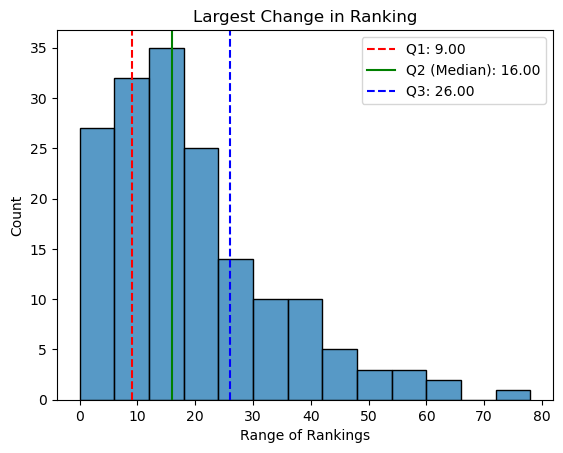

In [13]:
# Compute quartiles
q1 = np.percentile(us_news_rankings['Range of Rankings'], 25)
q2 = np.percentile(us_news_rankings['Range of Rankings'], 50)
q3 = np.percentile(us_news_rankings['Range of Rankings'], 75)

# Plot histogram
sns.histplot(us_news_rankings['Range of Rankings'], kde=False)

# Add vertical lines for quartiles
plt.axvline(x=q1, color='r', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(x=q2, color='g', linestyle='-', label=f'Q2 (Median): {q2:.2f}')
plt.axvline(x=q3, color='b', linestyle='--', label=f'Q3: {q3:.2f}')

# Display legend and title
plt.legend()
plt.title('Largest Change in Ranking')

plt.show()

As our histogram shows, there is a significant right skew with 50% of our data between 9 and 26.

Now let's look at the min of our Range of Rankings column. We want to see which schools haven't changed ranking.

In [14]:
us_news_summary[us_news_summary['Range of Rankings']==0]

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
56,Santa Clara University,2,55.0,55.0,0.0
119,Fairfield University,1,115.0,115.0,0.0
129,Gallaudet University,2,127.0,127.0,0.0
148,California State University-Long Beach,1,137.0,137.0,0.0
149,University of Maryland-Baltimore County,1,137.0,137.0,0.0
151,Simmons University,1,136.0,136.0,0.0
152,University of La Verne,1,136.0,136.0,0.0
154,University of Texas-Dallas,1,136.0,136.0,0.0
157,CUNY-City College,1,148.0,148.0,0.0
158,Duquesne University,1,148.0,148.0,0.0


We immediately notice that these schools are generally toward the bottom of our list. We also notice that in general they have only 1 year of data available. Obviously, a range = 0 is meaningless in such cases. This analysis also demonstrates that almost every school with more than 1 year of data has experienced a change in its rank&mdash;a fact we'll explore more later.

This observation raises an important question: what is the relationship between a school's range and the number of years available? A school with 15-20 years of data and a small range of rankings is more meaningful than a school with a small range that only has a few years of information.

Let's impose an additional restriction on our data: schools that have at least 10 years of data and see what we're left with:

In [15]:
# Redefine us_news_rankings & us_news_rankings_summary by looking at schools with 10+ years of data
us_news_rankings = us_news_rankings[us_news_rankings['Number of Years of Data Available']>=10]
us_news_summary = us_news_rankings[['University Name','Number of Years of Data Available', 'Lowest Rank', 'Highest Rank', 'Range of Rankings']]

# Print information about us_news_rankings
us_news_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 165
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   University Name                    123 non-null    object 
 1   IPEDS ID                           123 non-null    int64  
 2   State                              123 non-null    object 
 3   2023                               117 non-null    float64
 4   2022                               122 non-null    float64
 5   2021                               52 non-null     float64
 6   2020                               122 non-null    float64
 7   2019                               122 non-null    float64
 8   2018                               122 non-null    float64
 9   2017                               122 non-null    float64
 10  2016                               122 non-null    float64
 11  2015                               123 non-null    float64

Only 123 schools are now included.

Let's plot our histogram again based on this information. Fortunately, we don't need to change any of our code:

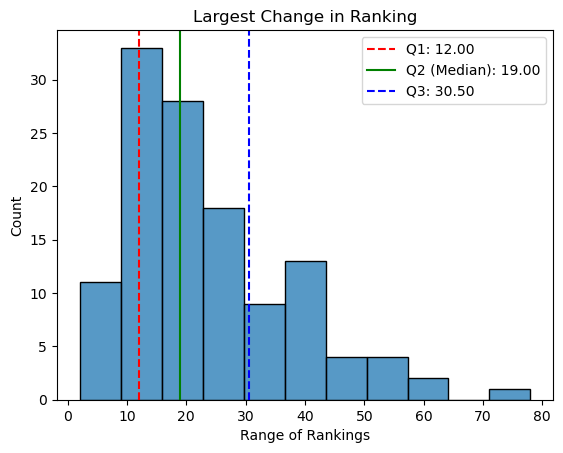

In [16]:
# Compute quartiles
q1 = np.percentile(us_news_rankings['Range of Rankings'], 25)
q2 = np.percentile(us_news_rankings['Range of Rankings'], 50)
q3 = np.percentile(us_news_rankings['Range of Rankings'], 75)

# Plot histogram
sns.histplot(us_news_rankings['Range of Rankings'], kde=False)

# Add vertical lines for quartiles
plt.axvline(x=q1, color='r', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(x=q2, color='g', linestyle='-', label=f'Q2 (Median): {q2:.2f}')
plt.axvline(x=q3, color='b', linestyle='--', label=f'Q3: {q3:.2f}')

# Display legend and title
plt.legend()
plt.title('Largest Change in Ranking')

plt.show()

The general shape of the histogram has changed a bit, although we still we still see right skew. Q1, Q2, and Q3 have all increased slightly.

Now let's see if we can find any correlation between the different summary columns we created.. We can use the Pearson correlation coefficient, which measures the strength of a linear association between two variables $x$ and $y$. The general formula for the coefficient is:


$$ r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}} $$

where $\bar{x}$ and $\bar{y}$ are the means of the respective variables and $x_i$ and $y_i$ are the $i$th term of each variable. A value of 1 indicates an exact _positive_ linear relationship and a value of -1 indicates an exact _negative_ linear relationship.

Fortunately, we can use the .corr() method in pandas to calculate the Pearson correlation coefficient between every pair of columns in our DataFrame. In this case, we'll just use the summary DataFrame, us_news_summary:

In [17]:
# Create a table of Pearson correlation coefficients
us_news_summary.corr(numeric_only=True)

,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
Number of Years of Data Available,1.000000,-0.889528,-0.876666,-0.578685
Lowest Rank,-0.889528,1.000000,0.961747,0.579783
Highest Rank,-0.876666,0.961747,1.000000,0.780803
Range of Rankings,-0.578685,0.579783,0.780803,1.000000


In this case, the only values of 1 occur when the table correlates a column with itself (as to be expected). However, we find strong negative correlation between Number of Years of Data Available and both Lowest Rank and Highest Rank, indicating that the better a school's rank, the longer it has been participating in the US News Rankings. This indeed can be historically verified that only the most prestigious schools participated in early years.

There is an even stronger correlation (this time positive) between a school's Lowest Rank and Highest Rank at .96. This indicates that the higher a school's lowest rank, the higher its highest rank. This means that even though schools experience fluctuations in rank, it occurs in a relatively limited range and especially not in a way that would affect the perception of the school.

The correlation between a school's lowest rank and its range of rankings is mild (at almost .6), although the correlation of a school's highest rank is quite hight, at .78

Let's visualize 3 of these relationships using scatter plots:

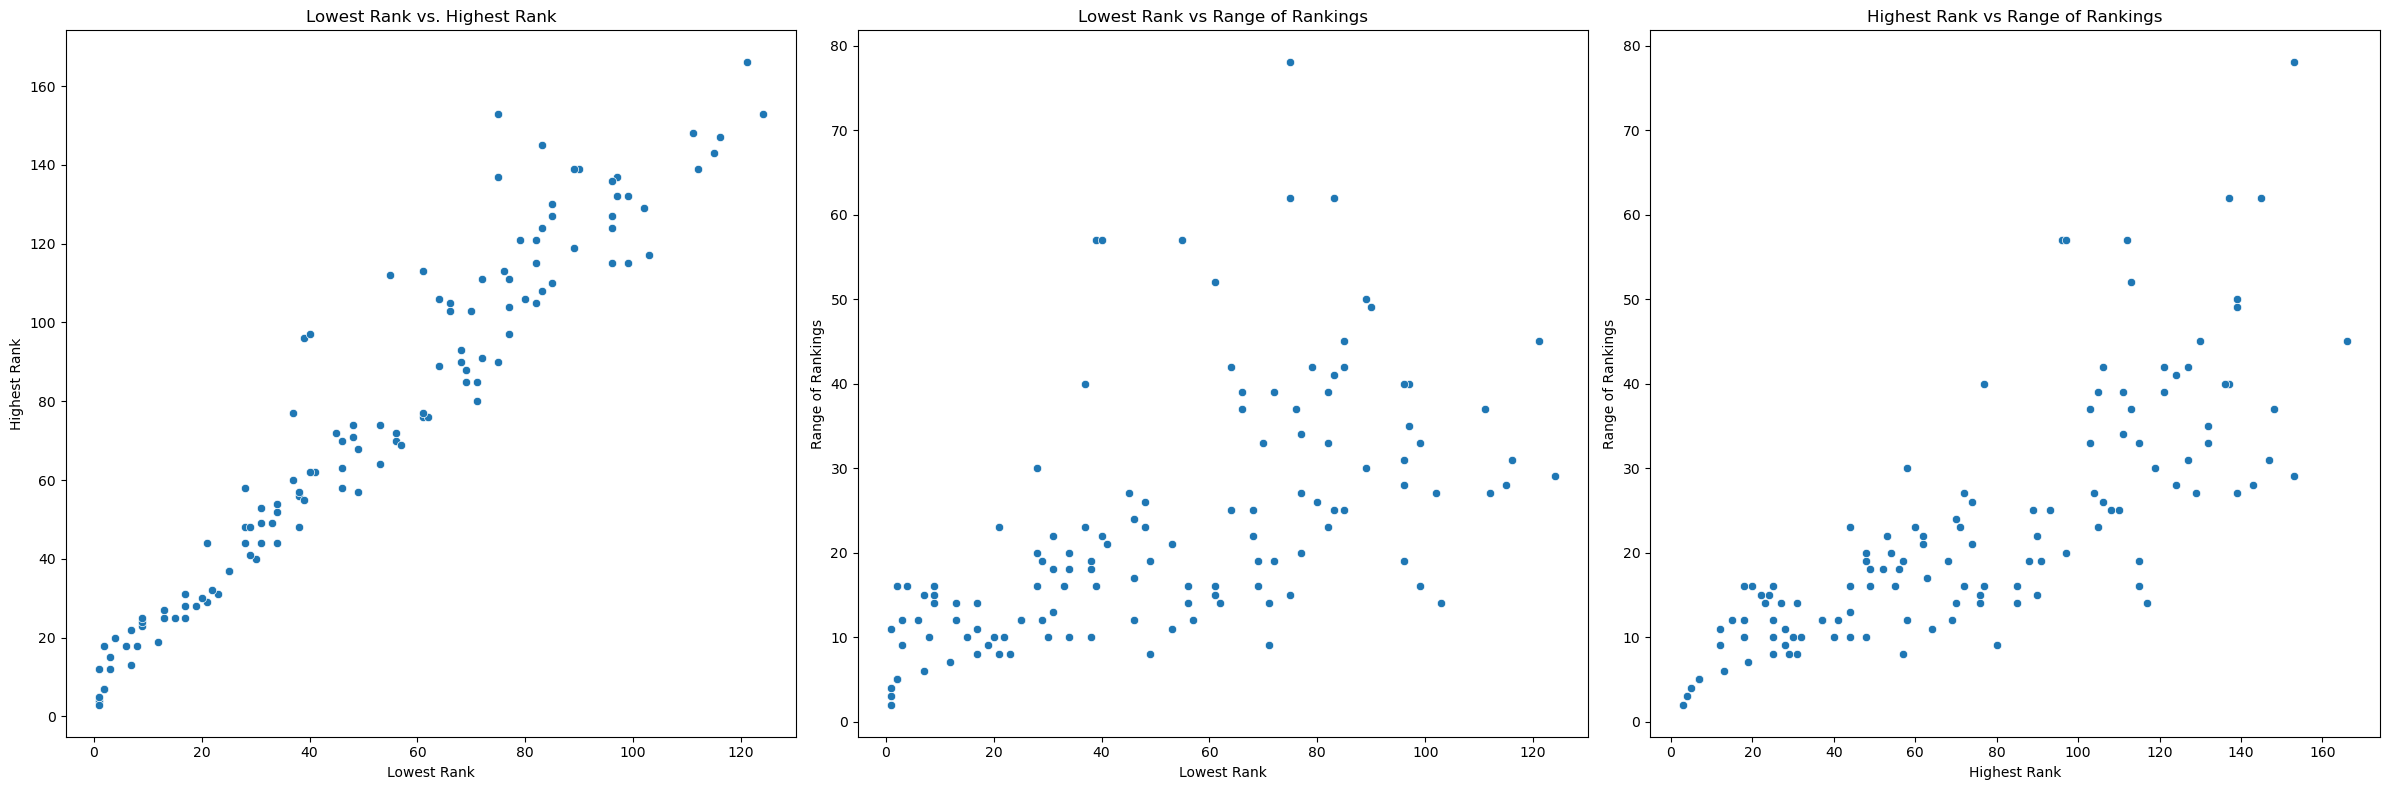

In [18]:
# Set parameters for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot 'Lowest Rank' vs 'Highest Rank'
sns.scatterplot(data=us_news_rankings, x='Lowest Rank', y='Highest Rank', ax=axes[0])
axes[0].set_title('Lowest Rank vs. Highest Rank')

# Plot 'Lowest Rank' vs 'Range of Rankings'
sns.scatterplot(data=us_news_rankings, x='Lowest Rank', y='Range of Rankings', ax=axes[1])
axes[1].set_title('Lowest Rank vs Range of Rankings')

# Plot 'Highest Rank' vs 'Range of Rankings'
sns.scatterplot(data=us_news_rankings, x='Highest Rank', y='Range of Rankings', ax=axes[2])
axes[2].set_title('Highest Rank vs Range of Rankings')

plt.tight_layout()
plt.show()

As expected, we see a very obvious linear correlation between a school's Lowest Rank and its Highest Rank, a weaker correlation between Lowest Rank and the Range of Rankings, and a stronger correlation between Highest Rank and the Range of Rankings.

However, the last scatterplot reveals something that our Pearson correlation coefficient fails to capture: as the Highest Rank of a school increases along the x-axis, the points also are less clustered and more spread out. This suggests that the worse a school's rank, the more likely we are to see a larger difference in its ranking range, but this range also becomes more unpredictable. Some schools with a higher "Highest Ranking" have moments where they experience a significantly lower ranking at some point, but this can't be said every school with a similar highest rank.

For better-ranked schools, the data is more predictable. Several reasons can explain this. Since the public perception of Ivy League schools and other elite schools is strongly established, they have steady access to financial resources, star faculty, and a competitive candidate pool. On the other hand, lower-ranked schools are often younger institutions with less-established reputations. Schools with a worse rank in a given year may decide to launch various initiatives to improve the quality of the school's ranking (recruiting outstanding faculty, fundraising campaigns, engage in more outreach to prospective students, etc.) In other words, worse-ranked schools might try a wider variety of actions to increase their rank (with no guarantee of success).

Let's see if anything interesting happens with 5 more years of data (15+ years):

In [19]:
# Redefine us_news_rankings & us_news_rankings_summary by looking at schools with 15+ years of data
us_news_rankings = us_news_rankings[us_news_rankings['Number of Years of Data Available']>=15]
us_news_summary = us_news_rankings[['University Name','Number of Years of Data Available', 'Lowest Rank', 'Highest Rank', 'Range of Rankings']]

# Print information about the DataFrame
us_news_rankings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 145
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   University Name                    116 non-null    object 
 1   IPEDS ID                           116 non-null    int64  
 2   State                              116 non-null    object 
 3   2023                               116 non-null    float64
 4   2022                               116 non-null    float64
 5   2021                               52 non-null     float64
 6   2020                               116 non-null    float64
 7   2019                               116 non-null    float64
 8   2018                               116 non-null    float64
 9   2017                               116 non-null    float64
 10  2016                               116 non-null    float64
 11  2015                               116 non-null    float64

We still have 116 universities (if we were to increase the number of years even more, the number of schools represented would be cut in half). Let's graph a histogram of the data:

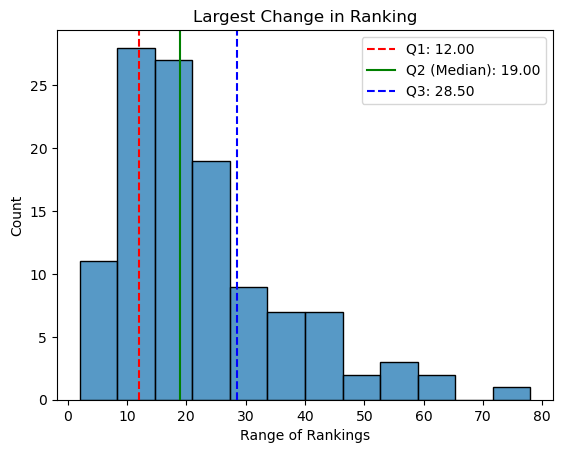

In [20]:
# Compute quartiles
q1 = np.percentile(us_news_rankings['Range of Rankings'], 25)
q2 = np.percentile(us_news_rankings['Range of Rankings'], 50)
q3 = np.percentile(us_news_rankings['Range of Rankings'], 75)

# Plot histogram
sns.histplot(us_news_rankings['Range of Rankings'], kde=False)

# Add vertical lines for quartiles
plt.axvline(x=q1, color='r', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(x=q2, color='g', linestyle='-', label=f'Q2 (Median): {q2:.2f}')
plt.axvline(x=q3, color='b', linestyle='--', label=f'Q3: {q3:.2f}')

# Display legend and title
plt.legend()
plt.title('Largest Change in Ranking')

plt.show()

The shape has changed a bit more noticeably, and the quartiles have again increased slightly. What about the Pearson correlation coefficients?

In [21]:
us_news_summary.corr(numeric_only=True)

,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
Number of Years of Data Available,1.000000,-0.903559,-0.889036,-0.577681
Lowest Rank,-0.903559,1.000000,0.957168,0.562954
Highest Rank,-0.889036,0.957168,1.000000,0.778137
Range of Rankings,-0.577681,0.562954,0.778137,1.000000


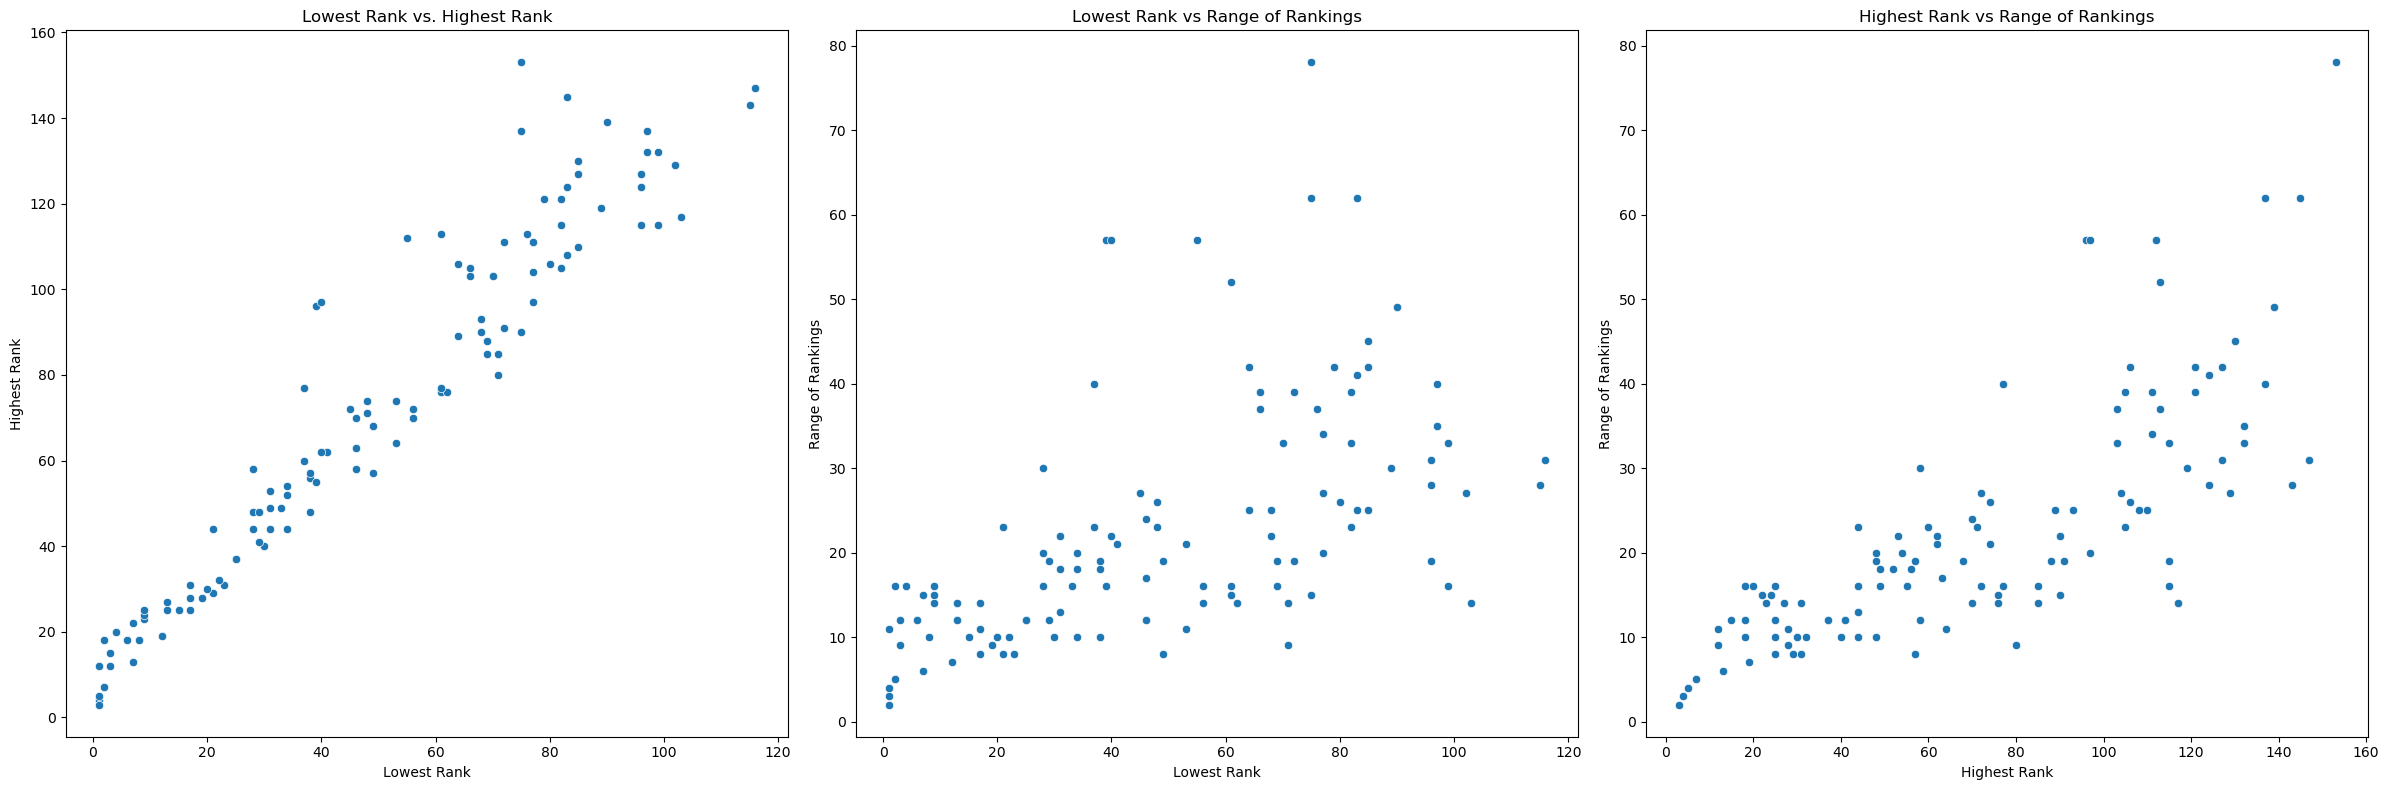

In [22]:
# Set parameters for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot 'Lowest Rank' vs 'Highest Rank'
sns.scatterplot(data=us_news_rankings, x='Lowest Rank', y='Highest Rank', ax=axes[0])
axes[0].set_title('Lowest Rank vs. Highest Rank')

# Plot 'Lowest Rank' vs 'Range of Rankings'
sns.scatterplot(data=us_news_rankings, x='Lowest Rank', y='Range of Rankings', ax=axes[1])
axes[1].set_title('Lowest Rank vs Range of Rankings')

# Plot 'Highest Rank' vs 'Range of Rankings'
sns.scatterplot(data=us_news_rankings, x='Highest Rank', y='Range of Rankings', ax=axes[2])
axes[2].set_title('Highest Rank vs Range of Rankings')

plt.tight_layout()
plt.show()

We see no drastic difference in the coefficients or scatterplots when we only consider schools with 15 years of data or more represented.

Let's now consider a different question. We've seen that a school's lowest rank and highest rank are highly correlated, with a Pearson correlation coefficient of almost 1. This tells us that as a school's lowest rank increases, so does its highest rank. This means that a school's fluctuation is not so drastic that it will usually change the perception of the school. 

From our last histogram, we saw that the bin with the largest number of schools represents those that have seen a fluctuation of 10-15 places, with 15-20 close behind. While this is much smaller than the largest value at 78, it is large enough to perhaps cause surprise (especially 15-20).

First, let's see if any schools have a range of 5 or less:

In [23]:
# Display schools with a Range of Rankings <=5
us_news_summary[us_news_summary['Range of Rankings']<=5]

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
0,Princeton University,34,1.0,4.0,3.0
1,Massachusetts Institute of Technology,34,2.0,7.0,5.0
2,Harvard University,34,1.0,3.0,2.0
3,Yale University,34,1.0,5.0,4.0
4,Stanford University,34,2.0,7.0,5.0


Of the 5 schools, 3 have had a placement of less than 5, and 2 are exactly at 5. Notably, of the 8 Ivy League schools, only the "Big Three" (Harvard, Princeton, and Yale) have maintained such a small variation.

The other 2 schools are Stanford, sometimes known as the "Ivy of the West," and MIT, whose prestige is often sharply delineated from the Ivies (especially Harvard) in that its reputation in American society is rooted almost entirely in its academic strengths rather the sociohistorical prestige of the Ivy League.

Now let's look at the ranges 5-10, 10-15, and 15-20:

In [24]:
# Display schools with a Range of Rankings 5-10
us_news_summary[(us_news_summary['Range of Rankings'] >5) & (us_news_summary['Range of Rankings'] <=10)]

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
9,Duke University,34,3.0,12.0,9.0
11,Dartmouth College,34,7.0,13.0,6.0
12,Brown University,34,8.0,18.0,10.0
15,Rice University,34,12.0,19.0,7.0
18,University of Notre Dame,31,15.0,25.0,10.0
22,Georgetown University,34,17.0,25.0,8.0
23,Carnegie Mellon University,33,19.0,28.0,9.0
24,University of Michigan-Ann Arbor,34,21.0,29.0,8.0
29,University of North Carolina-Chapel Hill,31,20.0,30.0,10.0
30,Wake Forest University,28,23.0,31.0,8.0


In this subset, all but one school has never cracked the top 50, and all but 2 have never ranked above 50.

In [25]:
# Display schools with a Range of Rankings 10-15
us_news_summary[(us_news_summary['Range of Rankings'] >10) & (us_news_summary['Range of Rankings'] <=15)]

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
5,University of Chicago,34,3.0,15.0,12.0
7,Johns Hopkins University,34,7.0,22.0,15.0
8,California Institute of Technology,34,1.0,12.0,11.0
10,Northwestern University,34,9.0,23.0,14.0
13,Vanderbilt University,33,13.0,25.0,12.0
14,Washington University in St. Louis,34,9.0,24.0,15.0
16,Cornell University,34,6.0,18.0,12.0
19,University of California-Los Angeles,33,17.0,31.0,14.0
20,University of California-Berkeley,34,13.0,27.0,14.0
25,University of Virginia,34,17.0,28.0,11.0


In [26]:
# Display schools with a Range of Rankings 15-20
us_news_summary[(us_news_summary['Range of Rankings'] >15) & (us_news_summary['Range of Rankings'] <=20)]

,University Name,Number of Years of Data Available,Lowest Rank,Highest Rank,Range of Rankings
6,University of Pennsylvania,34,4.0,20.0,16.0
17,Columbia University,34,2.0,18.0,16.0
21,Emory University,31,9.0,25.0,16.0
32,University of California-Santa Barbara,27,28.0,48.0,20.0
34,University of California-Irvine,28,33.0,49.0,16.0
38,University of Texas-Austin,24,38.0,56.0,18.0
39,University of Wisconsin-Madison,28,31.0,49.0,18.0
42,University of Illinois-Urbana-Champaign,28,34.0,52.0,18.0
43,Georgia Institute of Technology,28,29.0,48.0,19.0
44,Brandeis University,28,28.0,44.0,16.0


The range 15-20 is important because it contains the mode of our DataFrame (16). We also notice that the schools aren't quite as well ranked as opposed to our first few dataframes (most of these schools have never cracked the top 30), although 2 Ivy League Schools are included, Columbia University and University of Pennsylvania: both schoools' rankings, along with Emory's stand in noticeable contrast to the other schools in this set.

Conclusions:

The many gaps in the dataset, as mentioned by its creator, have to do with what data was _able_ to be collected. As we have seen, data for top-ranked schools from earlier years was more readily available than for lower-ranked schools. The creator of the dataset acknowledges that the data had to be found from numerous secondary sources, and the relative consistency of these sources only preserving data for the most prestigious school is an important observation itself since it speaks to the priorities and values of those collecting and preserving the data.

We have also seen that fluctuations in ranking are quite normal for schools with consistent ranking, with 50% of schools with 15 years of data or more having have a ranking range between 9 and 26. We should keep this in mind to avoid the temptation to be overly static in our perceptions of schools.